In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('quotes.csv')
df.head()

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [3]:
df.isna().sum()

Quote     0
Author    0
Tags      3
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

Quote     0
Author    0
Tags      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quote   97 non-null     object
 1   Author  97 non-null     object
 2   Tags    97 non-null     object
dtypes: object(3)
memory usage: 3.0+ KB


In [8]:
df.describe()

,Quote,Author,Tags
count,97,97,97
unique,97,49,83
top,“The world as we have created it is a process ...,Albert Einstein,love
freq,1,10,4


C:\Users\Koina Garg\AppData\Local\Temp\ipykernel_22140\3126146758.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sor,x="Author",y="Num_of_Quot",palette="viridis")


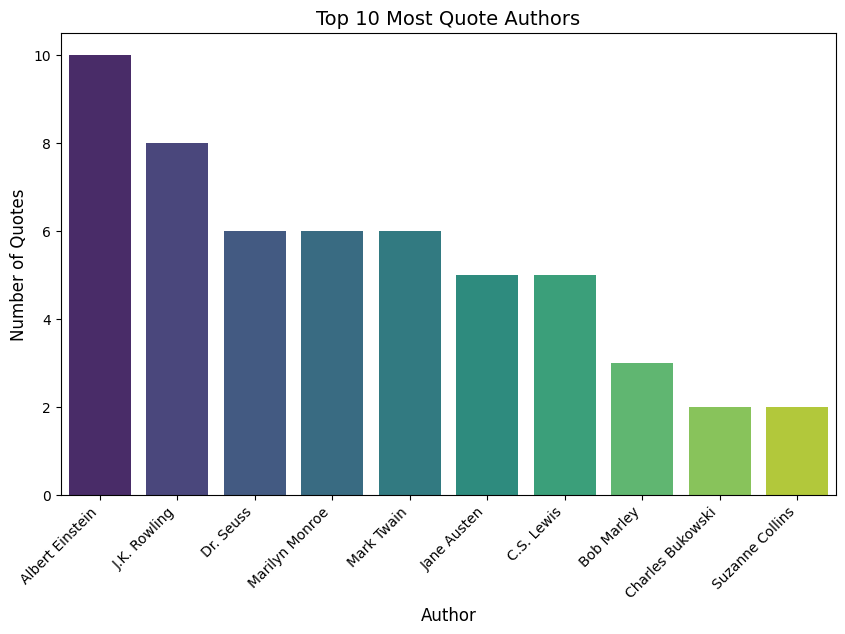

In [9]:
#Bar chart to 10 most quoted authors

df_author=df.groupby("Author")["Quote"].count().reset_index()
df_author.columns = ["Author","Num_of_Quot"]
df_sor =df_author.sort_values(by="Num_of_Quot",ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=df_sor,x="Author",y="Num_of_Quot",palette="viridis")
plt.title("Top 10 Most Quote Authors", fontsize=14)
plt.xlabel("Author", fontsize=12)
plt.ylabel("Number of Quotes", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


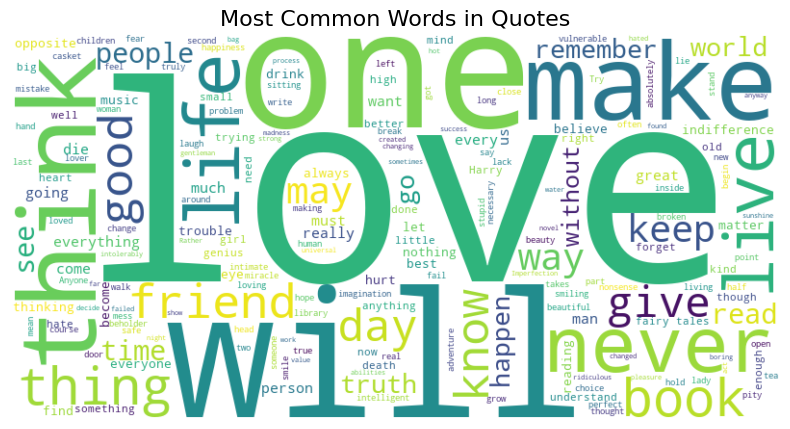

In [15]:
#word cloud of the most common words in the quotes
from wordcloud import WordCloud
text=" ".join(quote for quote in df['Quote'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Quotes", fontsize=16)
plt.show()

In [16]:
#pie chart for showing propation of top 5 tags

all_tags = df["Tags"].str.split(", ")
flat_tags = [tag.strip() for sublist in all_tags for tag in sublist if tag]
tag_counts = pd.Series(flat_tags).value_counts()
top_5_tags = tag_counts.head(5)
top_5_tags

love             14
inspirational    13
life             13
humor            12
books            11
Name: count, dtype: int64

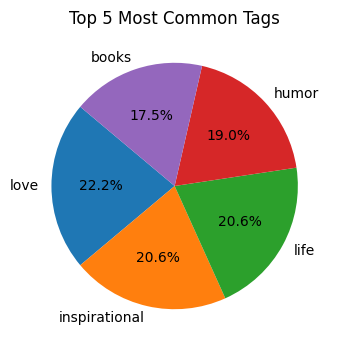

In [17]:
plt.figure(figsize=(4, 4))
plt.pie(top_5_tags, labels=top_5_tags.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Tags")
plt.show()

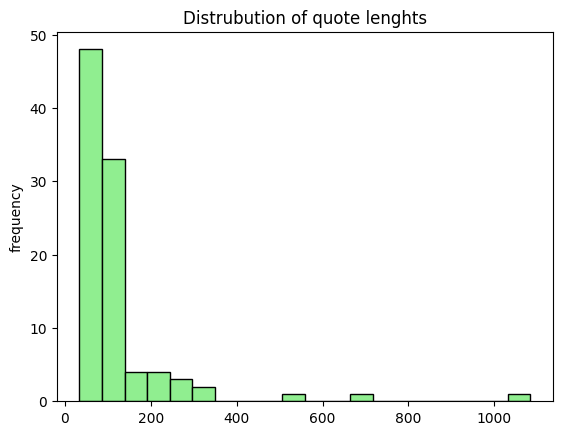

In [18]:
df['Quote_length']=df['Quote'].str.len()
plt.hist(df['Quote_length'],bins=20,color='lightgreen',edgecolor='black')
plt.title("Distrubution of quote lenghts")
plt.ylabel("frequency")
plt.show()

In [19]:
df['Quote'].str.len().sort_values()

56      34
36      34
64      36
57      40
51      41
      ... 
84     309
20     319
63     516
13     697
10    1084
Name: Quote, Length: 97, dtype: int64

## Insights of dataset from the visualsation
#### 1. Albert Einstein write the maximun number of quotes.
#### 2. There are 5 most commen tags which is used most of the times are " love, inspirational , life, humor, books "
#### 3. Histogram show that the quotes lenght is 50 most of the time , only one or two quotes are there which lenghts exceed 1000.
#### 4. "Love" is the word which is used most time in tags .
#### 5. The short quote which length is 34 and the longest quote which lenght is 1084
